# Solar r- and s-process Abundances

Figure 9.5 from Chapter 9 of *Stellar Structure & Evolution*, Pinsonneault & Ryden, Cambridge 
University Press.

Plot of solar r- and s-process element abundances using data from [Cowan et al. 2006](http://adsabs.harvard.edu/abs/2006nla..conf...82C), Table 1 listing abundances (by number) of heavy elements present in the Sun at its
formation, normalized to N(H)=10<sup>12</sup> hydrogen atoms

In [5]:
%matplotlib inline

import os, sys, math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.

In [6]:
plotFile = 'Fig9_5.png' 

# graphic aspect ratio = width/height

aspect = 2.0

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# Graphic dimensions depending on bitmap or vector format (draft vs production)

dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 12
labelFontSize = 8
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Read the Cowan 2006 data

Source data has 3 columns: atomic number and log10 of the s- and r-process abundances normalized to N(H)=10$^{12}$ hydrogen atoms. 

In [7]:
dataFile = 'rs_process_Cowan2006.txt'

data = pd.read_csv(dataFile,sep=r'\s+',comment='#')

Z = np.array(data['Z'])
logNs = np.array(data['logNs'])
logNr = np.array(data['logNr'])

# use masked arrays to mind the gaps.  Masked values are -999

sAbund = np.ma.masked_where(logNs==-999, logNs)
rAbund = np.ma.masked_where(logNr==-999, logNr)

# Anotations for selected elements

labelZ = [32,34,52,54,78,90,92]
labels = ['Ge','Se','Te','Xe','Pt','Th','U']

# Limits

minZ = 30.
maxZ = 95.

minA = -1.4
maxA = 3.9

### Solar r- and s-process plot

Plot r- and s-process as separate symbols and lines, minding gaps in the data
 * Plot the s-process elements as squares connected by dotted lines
 * Plot the r-process elements as circles connected by solid lines

Label Ge (z=32), SE (z=34), Te (z=52), Xe (z=54), Pt (z=78), Th (z=90) and U (z=92)

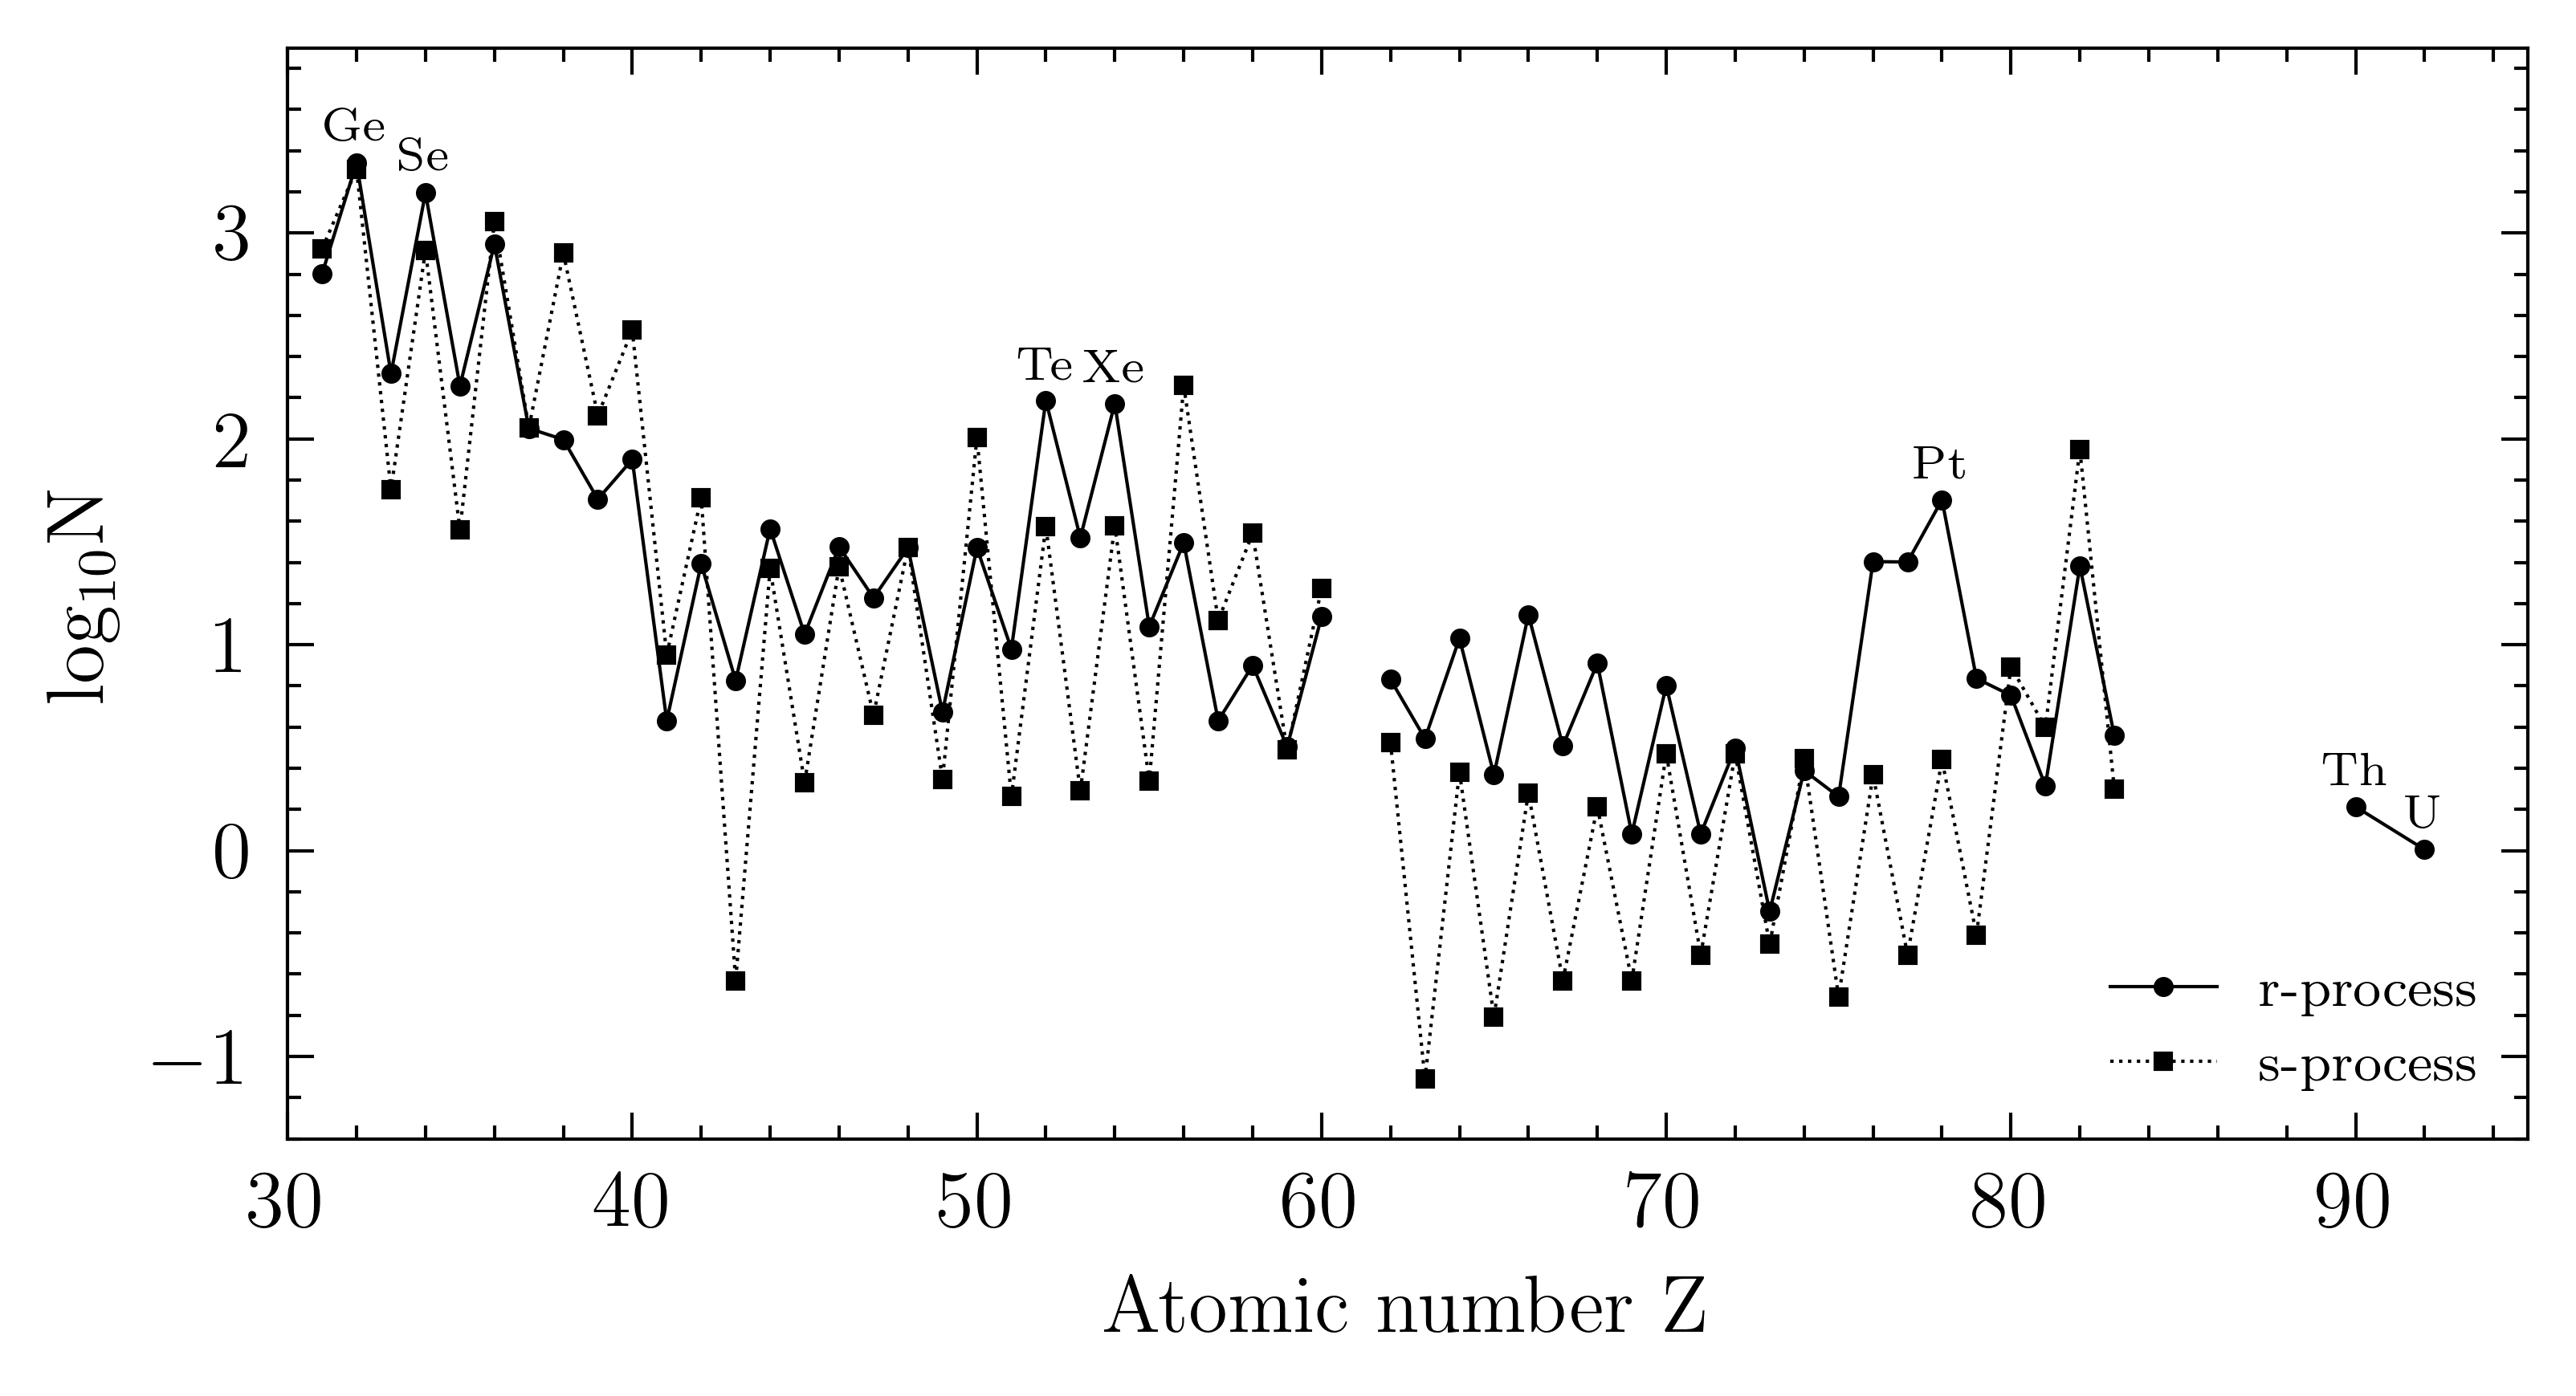

In [8]:
fig,ax = plt.subplots(figsize=(wInches,hInches),dpi=dpi)

ax.tick_params('both',length=4,width=lwidth,which='major',direction='in',top='on',right='on')
ax.tick_params('both',length=2,width=lwidth,which='minor',direction='in',top='on',right='on')

ax.set_xlim(minZ,maxZ)
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_minor_locator(MultipleLocator(2))
ax.set_xlabel(r'Atomic number Z',fontsize=axisFontSize)

ax.set_ylim(minA,maxA)
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(0.2))
ax.set_ylabel(r'log$_{10}$N',fontsize=axisFontSize)

# Plot r- then s-process

ax.plot(Z,rAbund,marker='o',ls='-',color='black',mfc='black',ms=2.5,mew=0.5,lw=0.5,zorder=10,label='r-process')
ax.plot(Z,sAbund,marker='s',ls=':',color='black',mfc='black',ms=2.5,mew=0.5,lw=0.5,zorder=10,label='s-process')

# Label selected nuclei by hand

labelSize = 7

ax.text(32,3.40,'Ge',va='bottom',ha='center',fontsize=labelSize)
ax.text(34,3.26,'Se',va='bottom',ha='center',fontsize=labelSize)
ax.text(52,2.24,'Te',va='bottom',ha='center',fontsize=labelSize)
ax.text(54,2.23,'Xe',va='bottom',ha='center',fontsize=labelSize)
ax.text(78,1.76,'Pt',va='bottom',ha='center',fontsize=labelSize)
ax.text(90,0.27,'Th',va='bottom',ha='center',fontsize=labelSize)
ax.text(92,0.065,'U',va='bottom',ha='center',fontsize=labelSize)

legend = ax.legend(fontsize=8,loc='lower right',frameon=False)
legend.get_frame().set_linewidth(0.5)

# Make the plot

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')